<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [21]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [23]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [24]:
import warnings
warnings.filterwarnings('ignore')
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize yourself with the dataset

In [25]:
# Displaying the first few rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [26]:
# Checking the data types and missing values in the dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [27]:
# Describing the dataset to get basic statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [28]:
# Checking for any duplicate rows in the dataset
duplicate_rows = boston_df[boston_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


<Figure size 1500x1500 with 0 Axes>

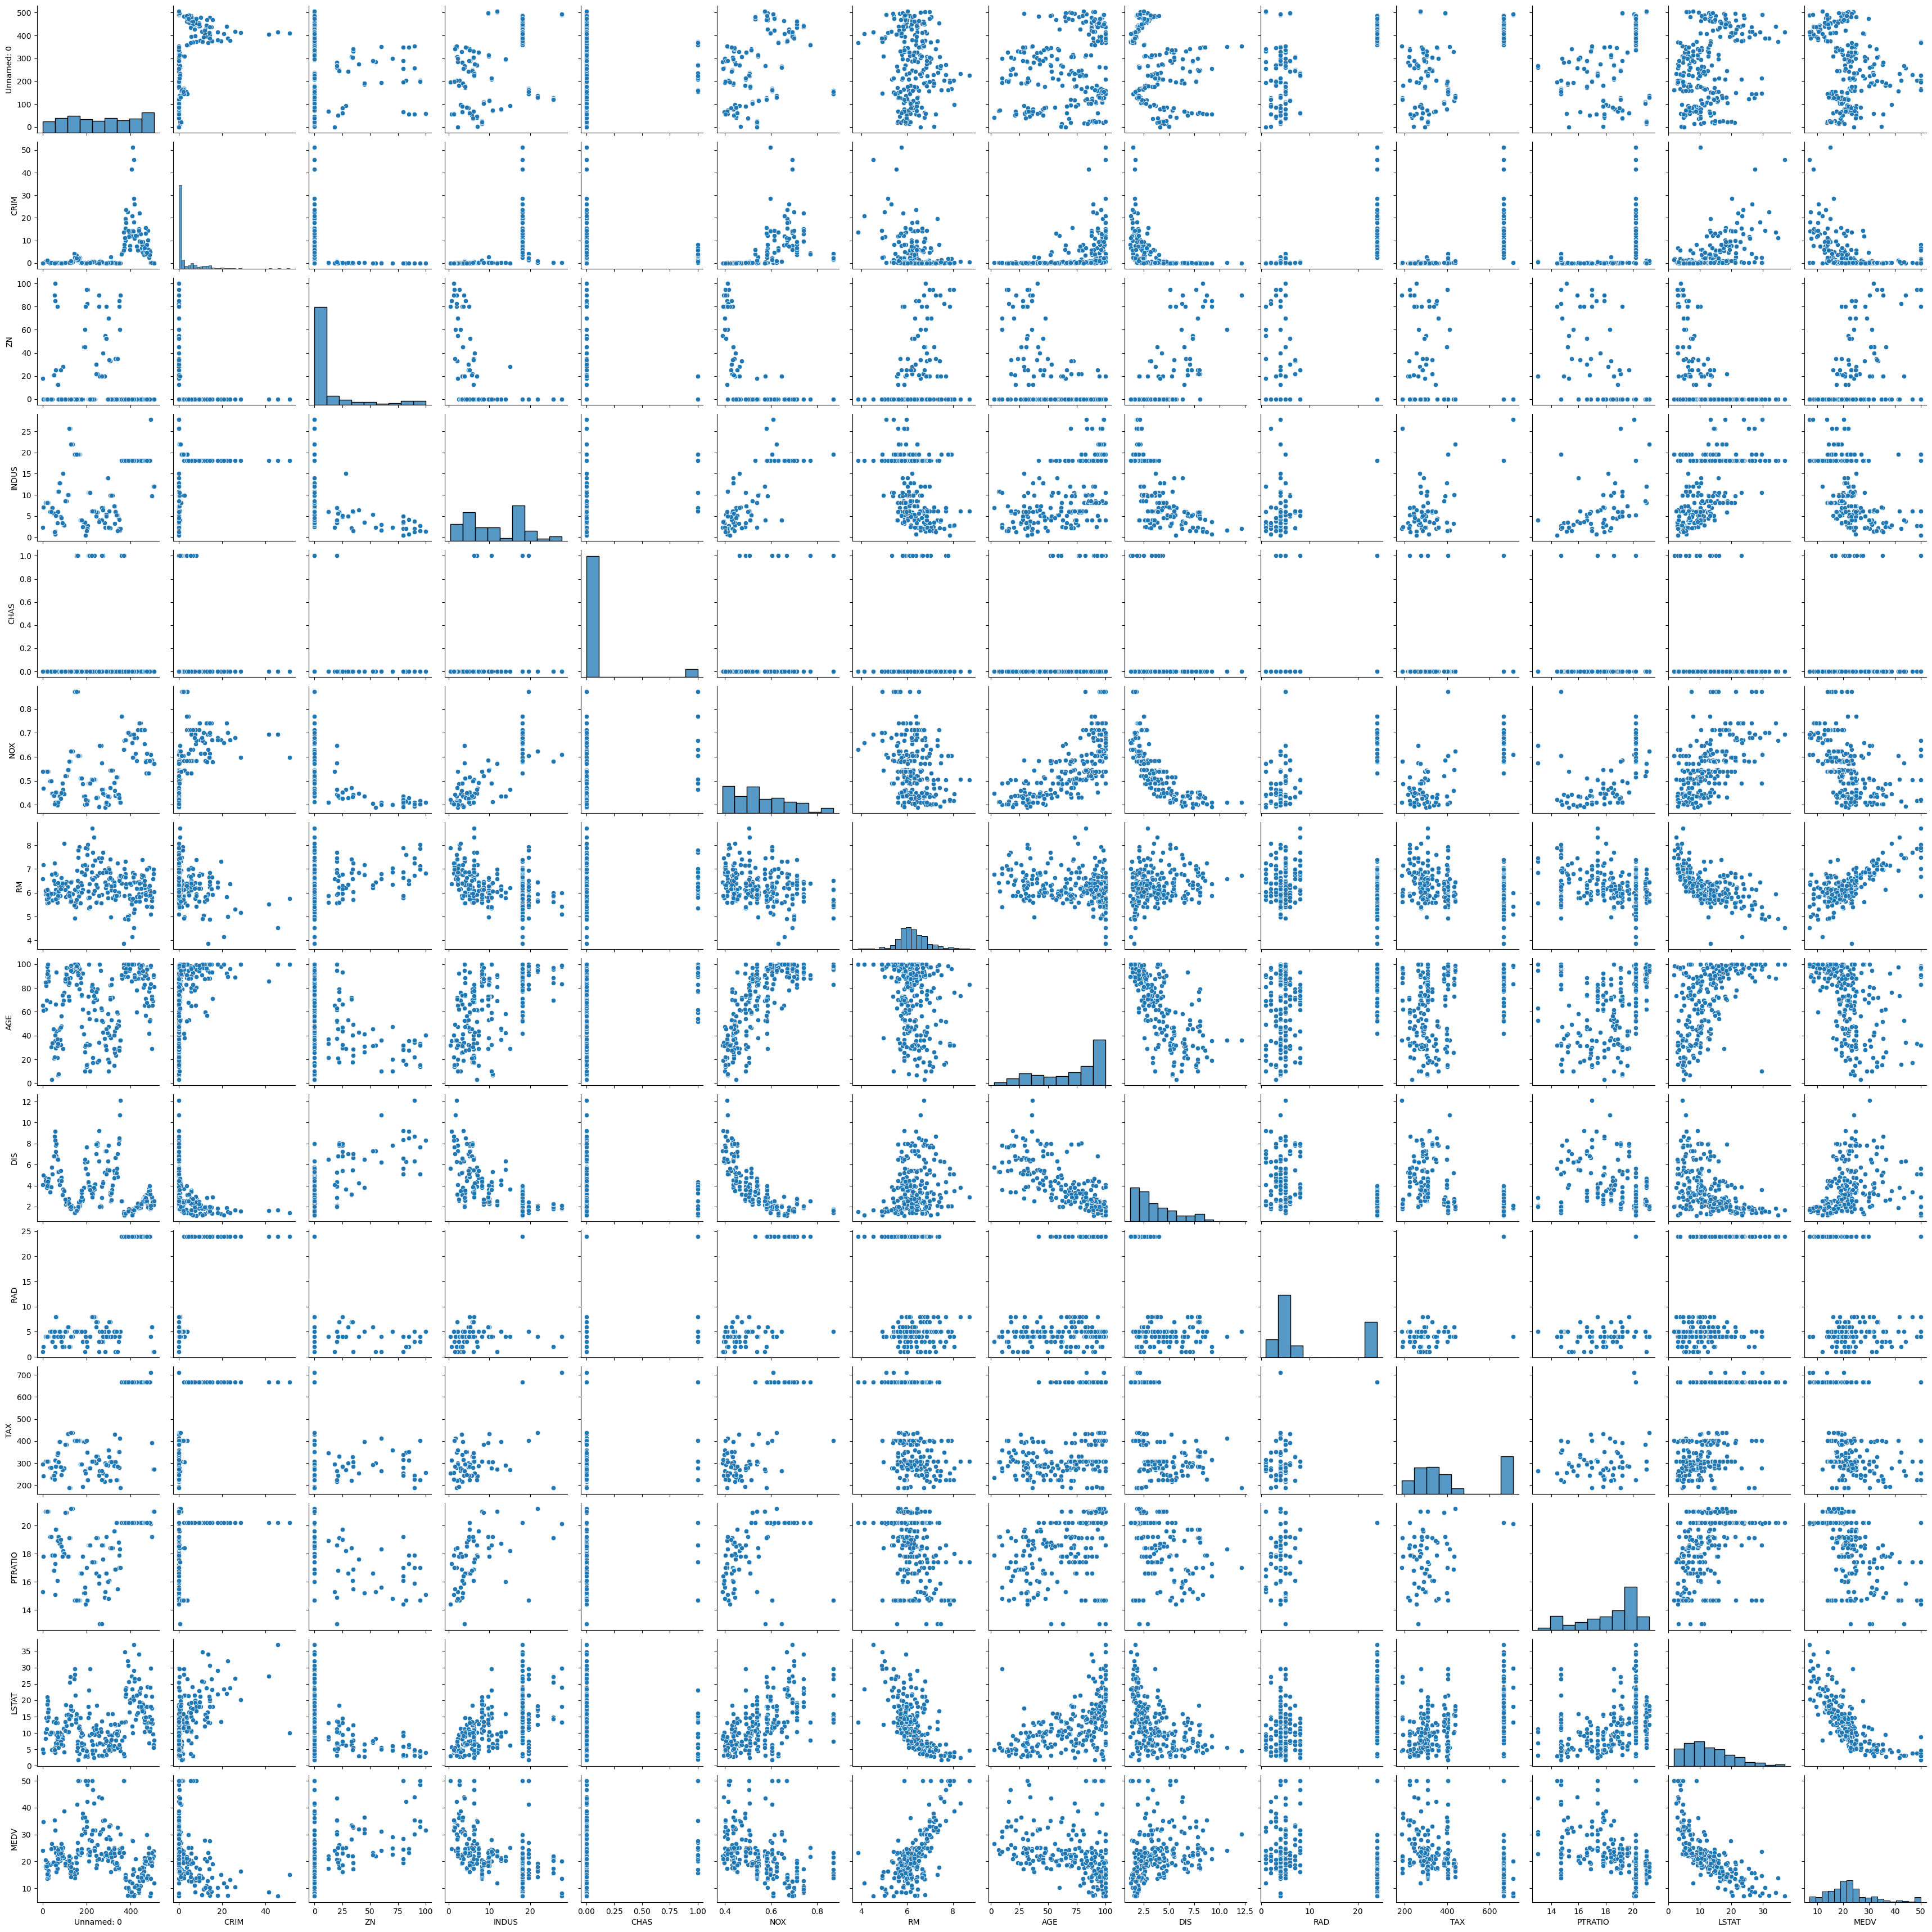

In [29]:
# Pairplot of features
pyplot.figure(figsize=(15, 15))
pyplot.suptitle('Pairplot of Features', x=0.5, y=0.95, ha='center', fontsize='large')
sns.pairplot(boston_df.sample(250))
pyplot.show()

# Task 2: Generate Descriptive Statistics and Visualizations

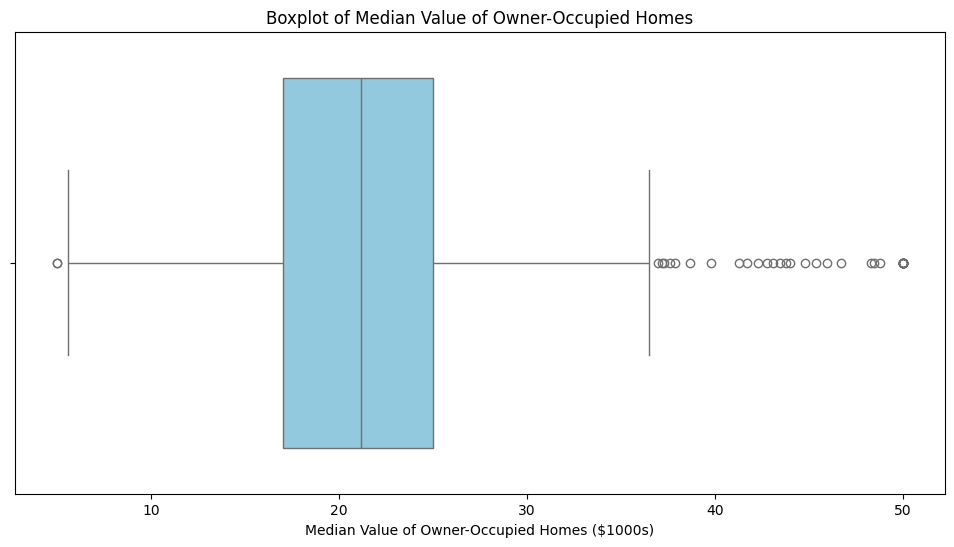

In [30]:
# Boxplot for the "Median value of owner-occupied homes"
pyplot.figure(figsize=(12, 6))
sns.boxplot(x='MEDV', data=boston_df, color='skyblue')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

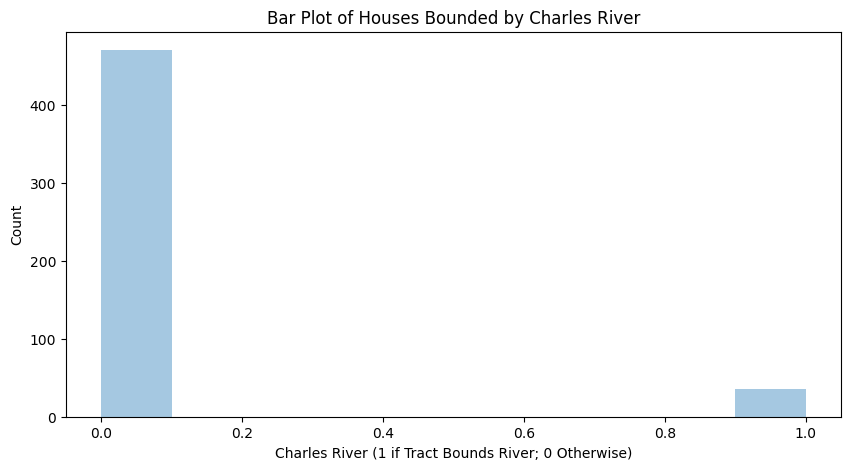

In [31]:
# Bar plot for the Charles river variable
pyplot.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
pyplot.title('Bar Plot of Houses Bounded by Charles River')
pyplot.xlabel('Charles River (1 if Tract Bounds River; 0 Otherwise)')
pyplot.ylabel('Count')
pyplot.show()

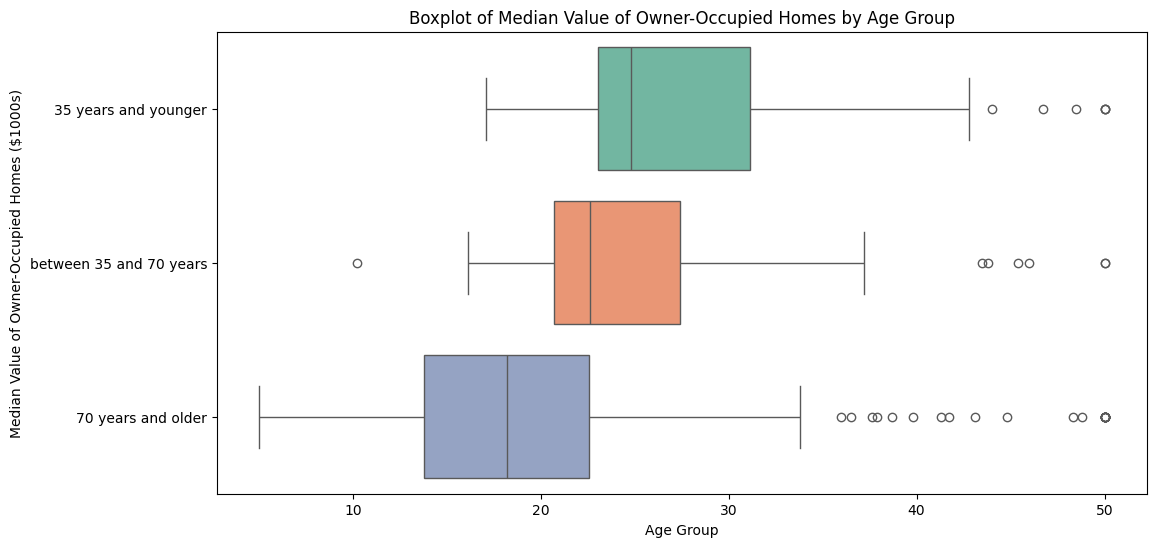

In [32]:
# Boxplot for the MEDV variable vs the AGE variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
pyplot.figure(figsize=(12, 6))
sns.boxplot(x='MEDV', y='AGE_group', data=boston_df, palette='Set2')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
pyplot.show()

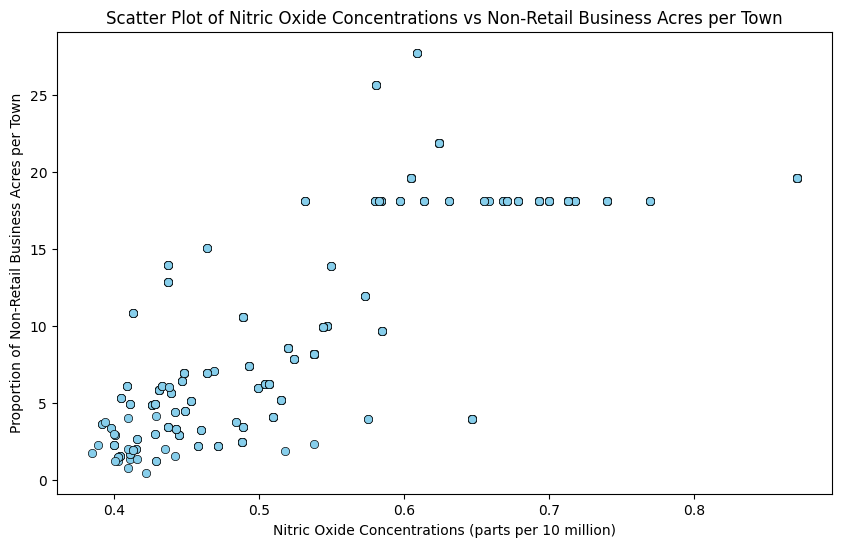

In [33]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='skyblue', edgecolor='black')
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres per Town')
pyplot.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town')
pyplot.show()

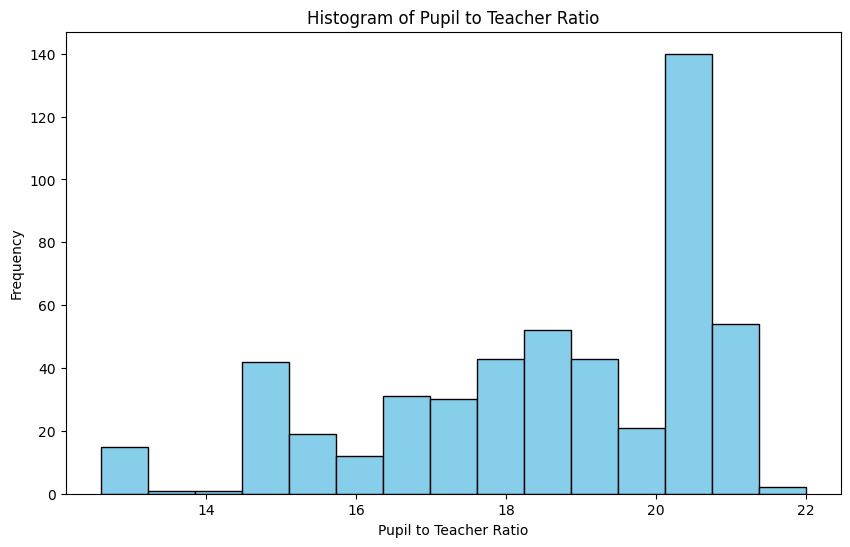

In [34]:
# Histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
pyplot.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?
(T-test for independent samples)

In [35]:
# T-test for independent samples to determine if there is a significant difference in median value of houses bounded by the Charles river or not
charles_river_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_charles_river_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(charles_river_houses, no_charles_river_houses)
print("T-test for houses bounded by Charles river vs. not:")
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("\033[1;32mConclusion: There is a significant difference in median value of houses bounded by the Charles river.\033[0m")
else:
    print("\033[1;31mConclusion: There is no significant difference in median value of houses bounded by the Charles river.\033[0m")

T-test for houses bounded by Charles river vs. not:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: There is a significant difference in median value of houses bounded by the Charles river.


Explaination: When the p-value is less than the significance level (typically 0.05),we reject the null hypothesis.
In this case, the p-value is much smaller than 0.05 (7.39e-05), indicating strong evidence against the null hypothesis.
Therefore, we conclude that there is a significant difference in the median value of houses bounded by the Charles river.

#### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [36]:
# ANOVA to determine if there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA for Median values of houses by AGE group:")
print(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print("\033[1;32mConclusion: There is a significant difference in Median values of houses for each proportion of owner occupied units built before 1940.\033[0m")
else:
    print("\033[1;31mConclusion: There is no significant difference in Median values of houses for each proportion of owner occupied units built before 1940.\033[0m")


ANOVA for Median values of houses by AGE group:
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: There is a significant difference in Median values of houses for each proportion of owner occupied units built before 1940.


Explaination: Based on the ANOVA table, the p-value (PR(>F)) is very small (1.710501e-15), which is much less than the typical significance level of 0.05. This indicates strong evidence against the null hypothesis, leading to the conclusion that there is a significant difference in median values of houses for each proportion of owner-occupied units built before 1940 (AGE_group).

#### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [37]:
# Pearson Correlation to determine if there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town:")
print("Correlation coefficient:", corr)
print("P-value:", p_val)
if p_val < 0.05:
    print("\033[1;32mConclusion: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.\033[0m")
else:
    print("\033[1;31mConclusion: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.\033[0m")


Pearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town:
Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


Explaination: Based on Pearson Correlation outcomes, the p-value is much smaller than 0.05 (7.91e-98), indicating strong evidence against the null hypothesis. Therefore, we conclude that there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [38]:
# Regression analysis to determine the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print("\nRegression Analysis for the impact of weighted distance to employment centres on median value of homes:")
print(model.summary())


Regression Analysis for the impact of weighted distance to employment centres on median value of homes:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        16:31:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [39]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = pearsonr(boston_df['DIS'], boston_df['MEDV'])
print("Pearson Correlation Coefficient:", corr_coefficient)

# Interpret the Pearson correlation coefficient
if corr_coefficient > 0:
    print("There is a positive correlation between weighted distance to employment centres and median home value.")
elif corr_coefficient < 0:
    print("There is a negative correlation between weighted distance to employment centres and median home value.")
else:
    print("There is no linear correlation between weighted distance to employment centres and median home value.")

Pearson Correlation Coefficient: 0.2499287340859039
There is a positive correlation between weighted distance to employment centres and median home value.


Based on the analysis, there is a weak positive correlation between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes. The Pearson correlation coefficient of 0.2499 suggests this positive relationship, indicating that as the distance to employment centres increases, the median home value tends to increase slightly.

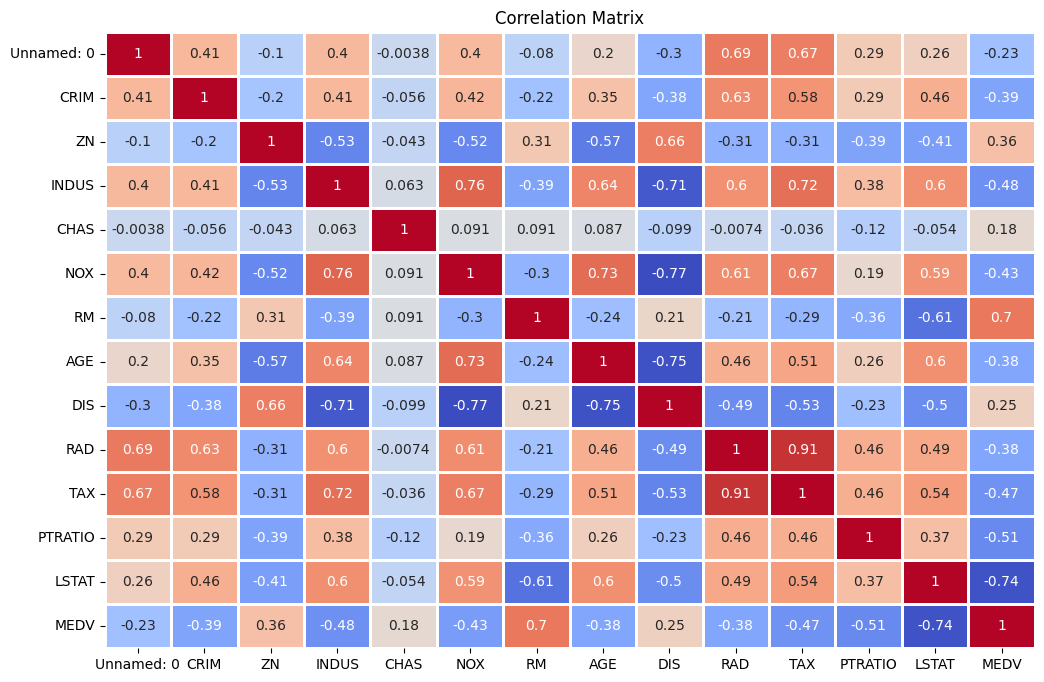

In [40]:
# Creating a correlation matrix
correlation_matrix = boston_df.corr()

# Creating a heatmap
pyplot.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, cbar=False)
pyplot.title('Correlation Matrix')
pyplot.show()

### Questions and Answers

#### 1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
- **T-statistic**: 3.996437466090509
- **P-value**: 7.390623170519905e-05
- **Answer**: There is a significant difference in median value of houses bounded by the Charles river.

#### 2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- **F-statistic**: 36.40765
- **PR(>F)**: 1.710501e-15
- **Answer**: There is a significant difference in median values of houses of each proportion of owner-occupied units built before 1940.

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- **Correlation coefficient**: 0.7636514469209192
- **P-value**: 7.913361061210442e-98.
- **Answer**: There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
- **DIS**: 1.0916
- **Pearson Correlation Coefficient**: 0.2499287340859039
- **Answer**: Based on the analysis, an additional weighted distance to the five Boston employment centres has a weak positive impact on the median value of owner-occupied homes.